In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import PyPDF2 as pdf
from Crypto.Cipher import AES
import tabula
import tabulate
import numpy as np
import pandas_datareader
from tradingview_ta import *

In [4]:
file = open("C:\\Users\\Personal\\Downloads\\smid_by_sector.pdf", 'rb')
fileReader = pdf.PdfFileReader(file)
n_pages = fileReader.numPages
table = tabula.read_pdf("C:\\Users\\Personal\\Downloads\\smid_by_sector.pdf", pages = 'all')
table

[                          Unnamed: 0 Unnamed: 1 Unnamed: 2  52-Week 52-Week.1  \
 0                            Company     Symbol      Price      NaN       NaN   
 1                                NaN        NaN        NaN     High       Low   
 2                                NaN        NaN        NaN      NaN       NaN   
 3   Communication Services (average)        n/a        n/a      n/a       n/a   
 4                 Liberty Global Plc      LBTYA     $15.62   $30.42    $15.58   
 5       Warner Bros. Discovery, Inc.        WBD     $11.66   $31.55    $11.20   
 6             Consumer Discretionary        n/a        n/a      n/a       n/a   
 7            Burlington Stores, Inc.       BURL    $114.49  $304.18   $106.47   
 8                        Chewy, Inc.       CHWY     $34.88   $80.58    $22.22   
 9          MGM Resorts International        MGM     $30.89   $51.17    $26.41   
 10                Vail Resorts, Inc.        MTN    $221.06  $376.24   $201.91   
 11   Small and 

In [5]:
# for each page, extract the Unnamed: 1 column and append to a list
# then concatenate the list into a single dataframe
# then drop the rows that equal 'Symbol' or 'n/a'
# then drop the duplicate rows
# then drop the last row
tickers = []
for i in range(3):
    tickers.append(table[i]['Unnamed: 1'])

tickers = pd.concat(tickers)
tickers.dropna(inplace = True)
tickers = tickers[tickers != 'Symbol']
tickers = tickers[tickers != 'n/a']
tickers.reset_index(drop = True, inplace = True)
tickers = tickers.drop_duplicates()
tickers = tickers[:-1]

tickers = tickers.to_list()

df = yf.download(tickers, start = '2020-01-01')['Adj Close']
df
# df = pandas_datareader.yahoo.daily.YahooDailyReader(tickers, start = '2020-01-01')
# df = df.read()
# df

[*********************100%***********************]  33 of 33 completed


,ADC,AXTA,BEPC,BRBR,BRO,BURL,CHE,CHWY,DCI,DEI,...,RLI,RPM,SIVB,STAG,SUI,TYL,WBD,WCN,WRB,WST
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,60.641254,30.650000,NaN,20.320000,38.742298,229.179993,436.886871,29.620001,55.544842,39.011822,...,85.268661,71.878471,254.270004,27.610352,139.057938,306.239990,32.220001,89.733925,43.887310,150.599609
2020-01-03,62.075272,30.410000,NaN,20.340000,38.781425,228.729996,437.481567,29.340000,55.065845,39.379520,...,85.618774,71.093285,250.330002,27.964100,141.340988,306.670013,32.029999,89.606750,43.944588,150.996628
2020-01-06,62.720581,30.180000,NaN,21.040001,38.752079,231.860001,442.467529,29.370001,54.347347,39.594757,...,86.811066,70.724327,249.240005,27.946419,140.708908,310.209991,31.959999,90.839325,43.880951,151.076004
2020-01-07,62.729549,30.549999,NaN,21.969999,38.634708,234.039993,438.413361,29.200001,54.050362,38.401974,...,84.644127,70.922981,250.399994,27.796076,138.586243,311.269989,32.070000,90.565430,43.079060,150.688904
2020-01-08,62.622002,30.549999,NaN,22.209999,38.918358,233.130005,444.202148,28.620001,53.782127,37.890793,...,84.596794,69.740479,252.779999,27.849138,139.595688,310.989990,32.110001,91.240417,43.384544,148.654327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,69.610001,25.950001,31.680000,24.860001,55.639999,153.660004,490.359985,43.209999,58.900002,16.799999,...,127.139999,97.620003,219.759995,32.500000,136.229996,320.350006,11.490000,134.885010,68.620003,242.309998
2022-11-15,69.589996,26.209999,32.270000,24.760000,55.799999,156.630005,496.679993,42.849998,60.310001,17.070000,...,128.229996,99.199997,239.929993,32.680000,139.009995,337.200012,11.330000,136.110001,69.110001,247.690002
2022-11-16,68.900002,25.660000,32.130001,24.950001,56.849998,149.559998,497.959991,42.240002,60.389999,16.459999,...,129.350006,99.199997,235.050003,32.689999,138.259995,335.640015,10.910000,138.389999,71.760002,240.100006


In [6]:
analysis_df = pd.DataFrame(columns=['RECOMMENDATION', 'BUY', 'SELL', 'NEUTRAL'])

for symbol in tickers:
    try:
        smid = TA_Handler(
            symbol = symbol,
            screener = "america",
            exchange = "NYSE",
            interval = Interval.INTERVAL_1_DAY,
        )
        # if smid.get_analysis().summary.get('RECOMMENDATION') == 'STRONG_BUY' or smid.get_analysis().summary.get('RECOMMENDATION') == 'BUY':
        #     print(smid.get_analysis().summary)
        analysis_df = analysis_df.append(smid.get_analysis().summary, ignore_index=True)
    except: 
        smid = TA_Handler(
            symbol = symbol,
            screener = "america",
            exchange = "NASDAQ",
            interval = Interval.INTERVAL_1_DAY,
        )
        # if smid.get_analysis().summary.get('RECOMMENDATION') == 'STRONG_BUY' or smid.get_analysis().summary.get('RECOMMENDATION') == 'BUY':
        #     print(smid.get_analysis().summary)
        analysis_df = analysis_df.append(smid.get_analysis().summary, ignore_index=True)
        continue

analysis_df.index = tickers
analysis_df.sort_values(by=['BUY'], inplace=True, ascending=False)
analysis_df

C:\Users\Personal\AppData\Local\Temp\ipykernel_16896\3913560102.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append(smid.get_analysis().summary, ignore_index=True)
C:\Users\Personal\AppData\Local\Temp\ipykernel_16896\3913560102.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append(smid.get_analysis().summary, ignore_index=True)
C:\Users\Personal\AppData\Local\Temp\ipykernel_16896\3913560102.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append(smid.get_analysis().summary, ignore_index=True)
C:\Users\Personal\AppData\Local\Temp\ipykernel_16896\3913560102.py:13: FutureWarning: The frame.append method is deprecated and will be rem

,RECOMMENDATION,BUY,SELL,NEUTRAL
WCN,STRONG_BUY,17,0,9
CHE,STRONG_BUY,16,0,10
BURL,BUY,15,2,9
MTN,BUY,15,1,10
KEYS,BUY,15,1,10
RPM,BUY,15,1,10
WRB,BUY,14,2,10
CHWY,BUY,14,2,10
MGM,BUY,14,2,10
LW,BUY,14,2,10


In [7]:
smid_stocks = analysis_df.head(8).index.to_list()
smid_df = yf.download(smid_stocks, start = '2022-01-01')['Adj Close']
smid_df.index = pd.to_datetime(smid_df.index)

[*********************100%***********************]  8 of 8 completed


In [8]:
buy_dates = pd.date_range(smid_df.index[0], smid_df.index[-1], freq='1M')

In [9]:
buy_prices = smid_df[smid_df.index.isin(buy_dates)]
buy_prices

,BURL,CHE,CHWY,KEYS,MTN,RPM,WCN,WRB
Date,,,,,,,,
2022-01-31,236.929993,467.469666,47.610001,168.820007,270.290436,87.361633,123.809181,55.652695
2022-02-28,225.889999,477.195099,47.139999,157.369995,254.147141,83.378548,122.607819,59.472649
2022-03-31,182.169998,505.390381,40.779999,157.970001,255.758362,80.292648,138.960846,65.881783
2022-05-31,168.300003,483.643127,24.799999,145.600006,247.838089,87.265877,127.095612,70.373489
2022-06-30,136.229996,468.656616,34.720001,137.850006,216.101028,77.974693,123.528084,68.154076
2022-08-31,140.190002,475.819672,34.330002,163.889999,222.671753,92.735542,138.917374,64.699448
2022-09-30,111.889999,436.220490,30.719999,157.360001,213.712570,82.930412,134.875031,64.580002
2022-10-31,142.960007,466.506897,38.730000,174.149994,219.130005,94.570000,131.661102,74.379997


In [10]:
mtl_invest_amt = 250
total_invest_amt = mtl_invest_amt*len(buy_prices)

In [11]:
es_frac_amt = 31.25 / buy_prices
es_frac_amt_sum = es_frac_amt.cumsum()
es_total_frac_amt = es_frac_amt_sum.tail(1).reset_index().drop('Date', axis=1)
current_prices = smid_df.tail(1).reset_index().drop('Date', axis=1)
es_stock_amt = es_total_frac_amt.mul(current_prices, axis=1)
es_stock_amt.sum(axis=1)/total_invest_amt

0    1.087175
dtype: float64

In [12]:
portfolio = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA', 'ADBE', 'NVDA', 'PYPL']
for stock in smid_stocks:
    portfolio.append(stock)

portfolio

['AAPL',
 'AMZN',
 'GOOG',
 'MSFT',
 'TSLA',
 'ADBE',
 'NVDA',
 'PYPL',
 'WCN',
 'CHE',
 'BURL',
 'MTN',
 'KEYS',
 'RPM',
 'WRB',
 'CHWY']

<AxesSubplot:title={'center':'Market Cap Distribution'}, ylabel='Size'>

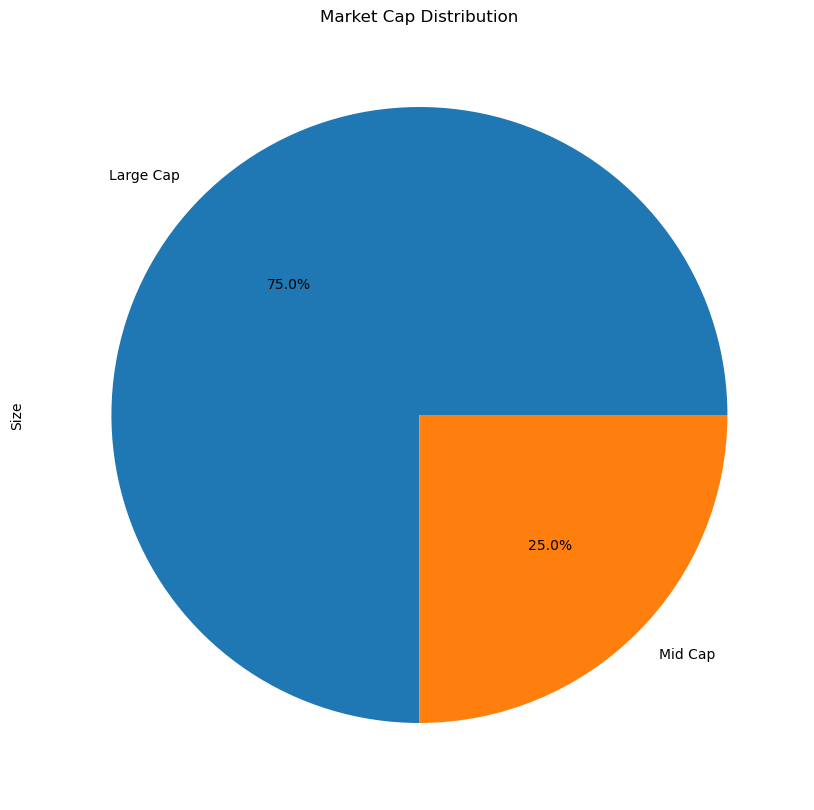

In [ ]:
tickers_data = {}

for ticker in portfolio:
    ticker_object = yf.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Recent"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

industries = []
for item in tickers_data:
    industries.append(tickers_data[item][tickers_data[item]['Attribute'] == 'industry']['Recent'].iloc[0])

market_caps = []
for item in tickers_data:
    market_caps.append(tickers_data[item][tickers_data[item]['Attribute'] == 'marketCap']['Recent'].iloc[0])

# create a dataframe from tickers_data with symbols as index and market cap as column
tickers_df = pd.DataFrame(market_caps, index=portfolio, columns=['Market Cap'])

# add a column to tickers_df with the that if the market cap is less than 2 billion, the value is Small Cap, 
# else if the market cap is less than 10 billion, the value is Mid Cap, else the value is Large Cap
tickers_df['Size'] = np.where(tickers_df['Market Cap'] < 2000000000, 'Small Cap', np.where(tickers_df['Market Cap'] < 10000000000, 'Mid Cap', 'Large Cap'))

# donut chart of tickers_df by size
tickers_df['Size'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10), title='Market Cap Distribution')



In [ ]:
# create a dataframe that show how many times each industry appears
industries = pd.DataFrame(industries, columns=['Industry'])
industries = industries['Industry'].value_counts().reset_index()
industries.columns = ['Industry', 'Count']
industries


,Industry,Count
0,Software—Infrastructure,2
1,Insurance—Property & Casualty,2
2,Consumer Electronics,1
3,Internet Retail,1
4,Internet Content & Information,1
5,Auto Manufacturers,1
6,Semiconductors,1
7,Credit Services,1
8,Medical Care Facilities,1
9,Resorts & Casinos,1


In [ ]:
sp500 = yf.download('^GSPC', start = '2022-01-01')['Adj Close']
sp500_buy_prices = sp500[sp500.index.isin(buy_dates)]
frac_amt = 250 / sp500_buy_prices
frac_amt_sum = frac_amt.cumsum()
total_frac_amt = frac_amt_sum.tail(1).reset_index().drop('Date', axis=1)
current_prices = sp500.tail(1).reset_index().drop('Date', axis=1)
stock_amt = total_frac_amt.mul(current_prices, axis=1)
stock_amt.sum(axis=1)/total_invest_amt

[*********************100%***********************]  1 of 1 completed


0    0.968
dtype: float64

In [ ]:
# download big tech stocks from yahoo finance and store in a dataframe
big_tech = yf.download(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA'], start = '2022-01-01')['Adj Close']
big_tech.index = pd.to_datetime(big_tech.index)
big_tech

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2022-01-03,180.959747,170.404495,145.074493,331.642426,399.926666
2022-01-04,178.663071,167.522003,144.416504,325.955750,383.196655
2022-01-05,173.910660,164.356995,137.653503,313.442993,362.706665
2022-01-06,171.007507,163.253998,137.550995,310.966217,354.899994
2022-01-07,171.176529,162.554001,137.004501,311.124725,342.320007
...,...,...,...,...,...
2022-11-11,149.699997,100.790001,96.730003,246.415558,195.970001
2022-11-14,148.279999,98.489998,96.029999,240.871185,190.949997
2022-11-15,150.039993,98.940002,98.720001,241.290009,194.419998


In [ ]:
# download big tech stocks from yahoo finance and store in a dataframe
big_tech = yf.download(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA'], start = '2022-01-01')['Adj Close']
big_tech

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2022-01-03,180.959747,170.404495,145.074493,331.642456,399.926666
2022-01-04,178.663086,167.522003,144.416504,325.955750,383.196655
2022-01-05,173.910645,164.356995,137.653503,313.443024,362.706665
2022-01-06,171.007507,163.253998,137.550995,310.966217,354.899994
2022-01-07,171.176544,162.554001,137.004501,311.124725,342.320007
...,...,...,...,...,...
2022-11-11,149.699997,100.790001,96.730003,246.415558,195.970001
2022-11-14,148.279999,98.489998,96.029999,240.871185,190.949997
2022-11-15,150.039993,98.940002,98.720001,241.290009,194.419998
